In [49]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import itertools
import numpy as np

seed = 7
numpy.random.seed(seed)

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')


In [51]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [52]:
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [53]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print([id2word.get(i, " ") for i in X_train[7]]);

In [33]:
imdb.load_data(num_words=5000);

In [58]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [59]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 4,160,501.0
Trainable params: 4,160,501.0
Non-trainable params: 0.0
_________________________________________________________________
None


In [60]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
36s - loss: 0.5212 - acc: 0.7050 - val_loss: 0.2980 - val_acc: 0.8717
Epoch 2/5
33s - loss: 0.1931 - acc: 0.9241 - val_loss: 0.3149 - val_acc: 0.8686
Epoch 3/5
32s - loss: 0.0619 - acc: 0.9822 - val_loss: 0.4002 - val_acc: 0.8654
Epoch 4/5
32s - loss: 0.0119 - acc: 0.9985 - val_loss: 0.4863 - val_acc: 0.8628
Epoch 5/5
32s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5466 - val_acc: 0.8646
Accuracy: 86.46%


['acc', 'loss', 'val_acc', 'val_loss']


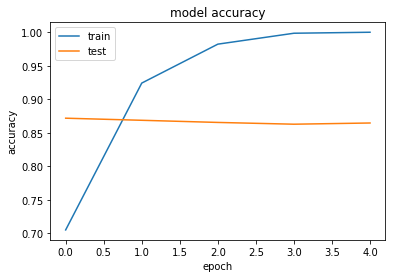

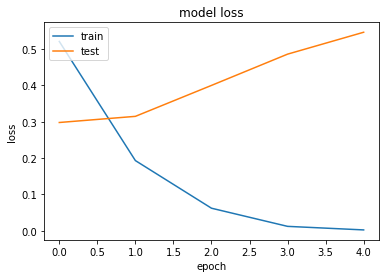

In [61]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
y_pred = model.predict_classes(X_test)

24832/25000 [============================>.] - ETA: 0s

Confusion matrix, without normalization
[[10557  1943]
 [ 1443 11057]]


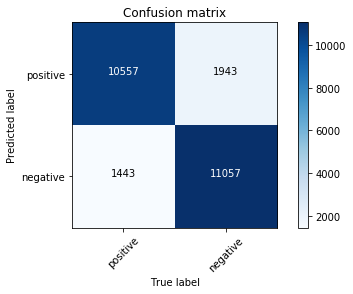

In [97]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=["positive","negative"], normalize=False)
plt.show()

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86     12000
          1       0.88      0.85      0.87     13000

avg / total       0.87      0.86      0.86     25000

